# Cancer Data

## Business question

1. Relation between 'diagnosis' and 'fractal_dimension_mean'
2. Relation betwwen 'radius_mean' and 'texture_mean'
3. Relation between 'area_mean' and 'compactness_mean' and 'smoothness_mean'

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

## Wrangling

In [3]:
df_cancer = pd.read_csv('data/cancer_data.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_cancer.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              548 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           521 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave_points_mean       569 non-null float64
symmetry_mean             504 non-null float64
fractal_dimension_mean    569 non-null float64
radius_SE                 569 non-null float64
texture_SE                548 non-null float64
perimeter_SE              569 non-null float64
area_SE                   569 non-null float64
smoothness_SE             521 non-null float64
compactness_SE            569 non-null float64
concavity_SE              569 non-null float64
conca

In [5]:
df_cancer.set_index('id', inplace = True)

In [6]:
df_cancer.shape

(569, 31)

In [7]:
for col in df_cancer.columns:
    print(col)

diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave_points_mean
symmetry_mean
fractal_dimension_mean
radius_SE
texture_SE
perimeter_SE
area_SE
smoothness_SE
compactness_SE
concavity_SE
concave_points_SE
symmetry_SE
fractal_dimension_SE
radius_max
texture_max
perimeter_max
area_max
smoothness_max
compactness_max
concavity_max
concave_points_max
symmetry_max
fractal_dimension_max


In [8]:
df_cancer.iloc[:, 0:11]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.24140,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648


In [9]:
df_cancer = df_cancer.iloc[:, 0:11]

In [10]:
df_cancer.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean              21
perimeter_mean             0
area_mean                  0
smoothness_mean           48
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean             65
fractal_dimension_mean     0
dtype: int64

In [11]:
df_cancer.duplicated().sum()

5

In [12]:
df_cancer.drop_duplicates(inplace=True)

In [41]:
df_cancer.duplicated().sum()

0

In [14]:
df_cancer.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [42]:
df_cancer.update(df_cancer.select_dtypes(include=[np.number]).fillna(0))

## EDA

### Bivariat Numerik vs Kategorik

In [48]:
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,0.00,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.00000,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


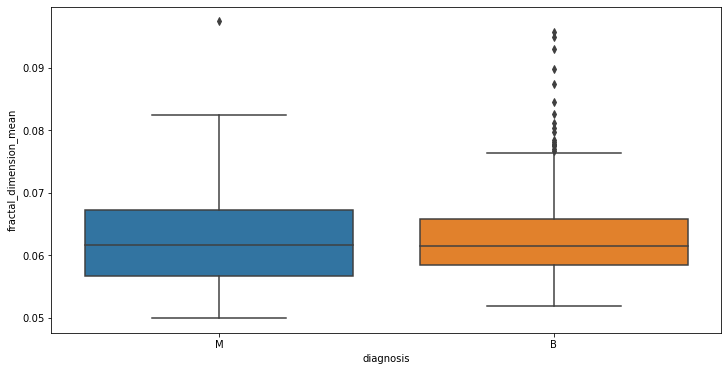

In [44]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=df_cancer);

### Linear Regression

In [34]:
y = df_cancer['radius_mean']
x1 = df_cancer['texture_mean']

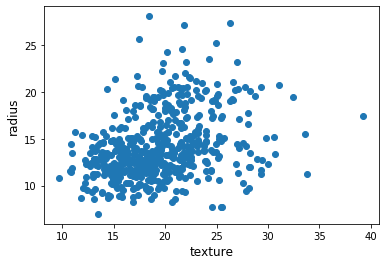

In [35]:
plt.scatter(x1,y)
plt.xlabel('texture',fontsize=12)
plt.ylabel('radius',fontsize=12)
plt.show()

In [46]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

D:\miniconda3\envs\jlml\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     40.90
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           3.37e-10
Time:                        21:20:27   Log-Likelihood:                -1488.9
No. Observations:                 564   AIC:                             2982.
Df Residuals:                     562   BIC:                             2991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.0816      0.496     22.333      0.000      10.107      12.056
texture_mean     0.1637      0.026      6.395      0.000       0.113       0.214
==============================================================================
Omnibus:                       62.154   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.849
Skew:                           0.840   Prob(JB):                     1.69e-18
Kurtosis:                       3.811   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

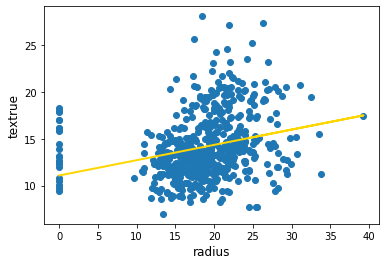

In [49]:
plt.scatter(x1,y)
yhat = 11.0816 + 0.1637*x1 
fig = plt.plot(x1,yhat, lw=2,c='gold',label='regression line')
plt.xlabel('radius',fontsize=12)
plt.ylabel('textrue',fontsize=12)
plt.show()

### Multiple Regression

In [51]:
y = df_cancer['area_mean']
x1 = df_cancer[['compactness_mean','smoothness_mean']]

In [54]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              area_mean   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     91.11
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           5.42e-35
Time:                        21:34:08   Log-Likelihood:                -4025.0
No. Observations:                 564   AIC:                             8056.
Df Residuals:                     561   BIC:                             8069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              334.1901     43.755      7.638      0.000     248.246     420.134
compactness_mean  3320.5396    248.962     13.338      0.000    2831.528    3809.552
smoothness_mean   -312.8269    438.389     -0.714      0.476   -1173.910     548.257
==============================================================================
Omnibus:                      144.745   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.001
Skew:                           1.215   Prob(JB):                     1.73e-96
Kurtosis:                       6.586   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, 'Area vs Density')

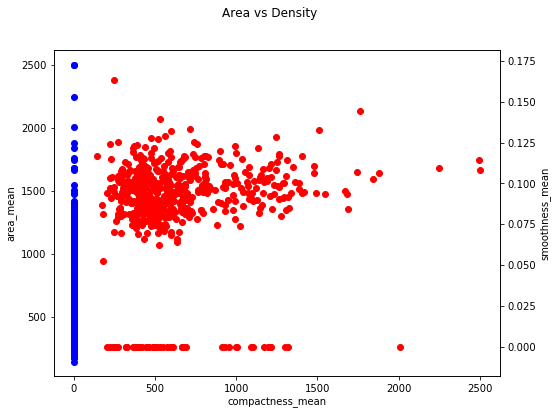

In [60]:
yhat = 334.1901 + 3320.5396*x1 + -312.8269*x1
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(x='compactness_mean', y='area_mean', data=df_cancer, c='b')
ax1.set_ylabel('area_mean') 
ax1.set_xlabel('compactness_mean')
ax2 = ax1.twinx()
ax2.scatter(x='area_mean', y='smoothness_mean', data=df_cancer, c='r')
ax2.set_ylabel('smoothness_mean')
fig.suptitle('Area vs Density')

# Story Telling

### distribusi hubungan antara kategori diagnosis dengan dimesi kerusakan
1.  pada kategori malignant ditemukan distribusi yang rata sehingga sifat kerusakan pada kanker ganas dapat dikatakatn relevan 
2.  pada kategori benign ditemukan distrbusi yang tidak rata karena sifat keusrakan kanker jinak variatif

### Adanya hubungan radius kanker dan tekstur dari kanker tersebut

1. Ho ditolak dapat diartikan bahwa adanya hubungan antar 2 variabel tersebut
2. hasil t tes menunjukan adahubungan tersebut

### adanya hubungan antara luas, kekompakan, dan kemulusan

1. Ho diterima dapat diatikan tidak ada hubungan antar 3 variable tersebut
2. hasil t tes tidak dapat menggambarkan hal tersebut